In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [29]:
class Maze:
  def __init__(self, maze, start_position, goal_position):
    self.maze = maze
    self.maze_height = maze_layout.shape[0]
    self.maze_width = maze_layout.shape[1]
    self.start_position = start_position
    self.goal_position = goal_position

  def show_maze(self):
    plt.figure(figsize=(10,10))
    plt.imshow(self.maze, cmap='gray')

    #Add start and goal position as 'S' and 'G'
    plt.text(self.start_position[0], self.start_position[1], 'START', ha='center', va='center', color='blue', fontsize=12)
    plt.text(self.goal_position[0], self.goal_position[1], 'GOAL', ha='center', va='center', color='blue', fontsize=12)

    plt.show()



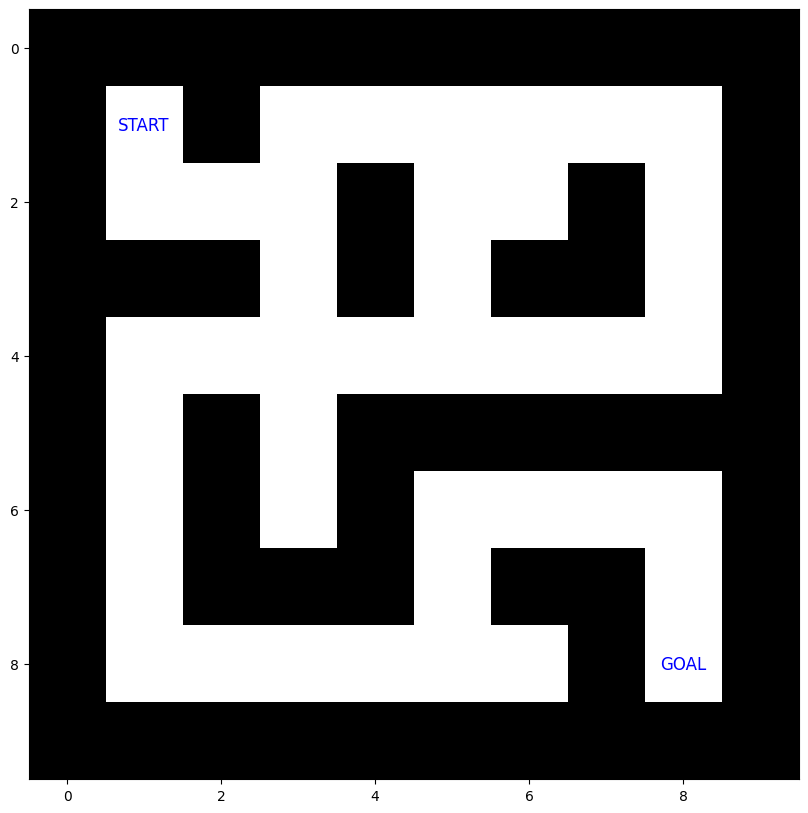

In [ ]:
# Create maze layout
maze_layout = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (1, 1), (8, 8))

maze.show_maze()

#### Implementing the Agent

In [ ]:
actions = [(-1, 0), # Up
           (1, 0), # Down
           (0, -1), # Left
           (0, 1)] # Right

class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
      # Initialize the Q-learning agent with a Q-table contanining all zeros
      self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))
      self.learning_rate = learning_rate
      self.discount_factor = discount_factor
      self.exploration_start = exploration_start
      self.exploration_end = exploration_end
      self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
      # Calculate the current exploration rate
      exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
      return exploration_rate

    def get_action(self, state, current_episode):
      exploration_rate = self.get_exploration_rate(current_episode)
      # Select an action for the given state either randomly(exploration) od using Q-table(exploitation)
      if np.random.rand() < exploration_rate:
          return np.random.randint(4)
      else:
          return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, next_state, reward):
      # find the best next action
      best_next_action = np.argmax(self.q_table[next_state])

      # get the current q value for the current state and the action
      current_q_value = self.q_table[state][action]

      # Q value update using Q learning formula
      new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

      return new_q_value

#### Defining the Reward System

In [ ]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

#### Testing the Agent

In [ ]:
# This function simulates the agent's movement in the maze for a single episode
def finish_episode(agent, maze, current_episode, train=True):
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    while not is_done:
        # Agent's action for current state
        action = agent.get_action(current_state, current_episode)

        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if next_state[0] < 1 or next_state[0] >= maze.maze_height or next_state[1] < 1 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 0:
            reward = wall_penalty
            next_state = current_state
        elif next_state == maze.goal_position:
            path.append(current_state)
            reward = goal_reward
            is_done = True
        else:
            path.append(current_state)
            reward = step_penalty

        episode_reward += reward
        episode_step += 1

        # Update agent's Q-table if training is enabled
        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)

        current_state = next_state

    return episode_reward, episode_step, path

Learned Path: 
(1, 1)-> (1, 1)-> (1, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (1, 2)-> (1, 1)-> (1, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (1, 1)-> (1, 2)-> (1, 1)-> (1, 2)-> (1, 1)-> (1, 2)-> (1, 1)-> (1, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (3, 2)-> (3, 1)-> (3, 2)-> (2, 2)-> (3, 2)-> (3, 1)-> (3, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (1, 1)-> (1, 2)-> (1, 1)-> (1, 2)-> (2, 2)-> (3, 2)-> (3, 3)-> (3, 2)-> (3, 1)-> (4, 1)-> (3, 1)-> (3, 2)-> (3, 3)-> (3, 4)-> (4, 4)-> (3, 4)-> (4, 4)-> (3, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (3, 4)-> (2, 4)-> (1, 4)-> (1, 5)-> (1, 4)-> (1, 5)-> (1, 4)-> (1, 5)-> (1, 6)-> (1, 5)-> (1, 4)-> (1, 5)-> (1, 6)-> (1, 7)-> (1, 8)-> (1, 7)-> (1, 8)-> (2, 8)-> (1, 8)-> (1, 7)-> (1, 6)-> (1, 5)-> (1, 4)-> (1, 5)-> (1, 4)-> (2, 4)-> (1, 4)-> (1, 5)-> (1, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (3, 5)-> (3, 6)-> (3, 5)-> (3, 6)-> (3, 5)-> (3, 4)-> (3, 3)-> (3, 2)-> (3, 

<Figure size 640x480 with 0 Axes>

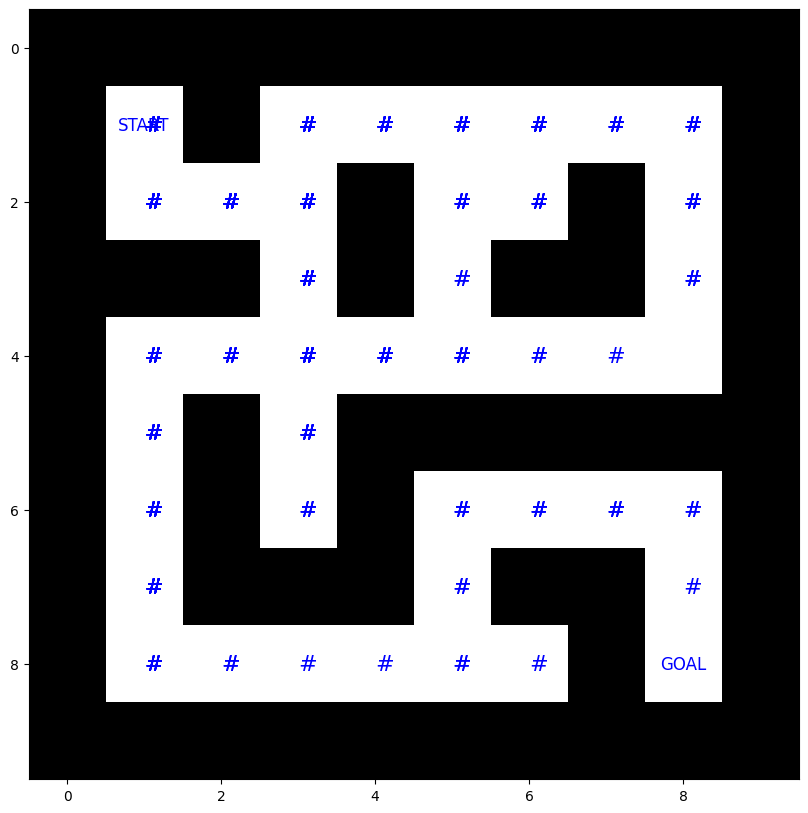

(603, -3031)

In [ ]:
# This function evaluates an agent's performance in the maze
def test_agent(agent, maze, num_episodes=1):
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the Learned path of the agent
    print('Learned Path: ')
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    if plt.gcf().get_axes():
        plt.cla()

    plt.figure(figsize=(10,10))
    plt.imshow(maze.maze, cmap='gray')

    plt.text(maze.start_position[0], maze.start_position[1], 'START', ha='center', va='center', color='blue', fontsize=12)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'GOAL', ha='center', va='center', color='blue', fontsize=12)

    for position in path:
        plt.text(position[0], position[1], '#', va='center', color='blue', fontsize=16)

    plt.show()

    return episode_step, episode_reward

agent = QLearningAgent(maze)
test_agent(agent, maze)

In [ ]:
def train_agent(agent, maze, num_episodes=100):
    episode_rewards = []
    episode_steps = []

    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f'The average reward is: {average_reward}')

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f'The average step is: {average_steps}')

    plt.tight_layout()
    plt.show()


In [ ]:
train_agent(agent, maze, num_episodes=100)

KeyboardInterrupt: 

In [31]:
test_agent(agent, maze, num_episodes=50)

KeyboardInterrupt: 